<a href="https://colab.research.google.com/github/DivyaDharshini2293/Machine-learning/blob/main/BYTS_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classificatoion
-Supervised Algorithm\
-Has Root node,Intermediate Nodes,Leaf node\
-**root node**-Main condition\
-**indermediate node**-conditions\
-**leaf node**-Labels or Class \




**Entropy** in ML models quantifies the amount of uncertainty (or surprise) involved in the value of a random variable or the outcome of a random process. Its significance in the decision tree is that it allows us to estimate the impurity or heterogeneity of the target variable.
**Entropy measures how much variance the data has.**

**Independent variable with lowest entropy is taken as the root node**

Low entropy =High Information gain\
High entropy =Low Information gain

CART(Classification And Regression Tree)
ID3

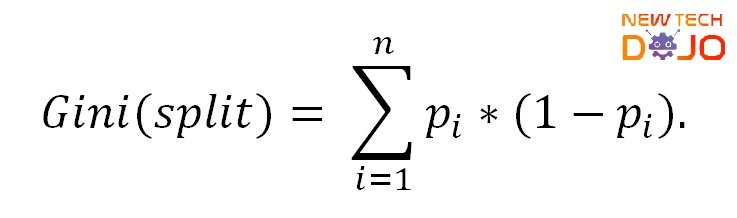

source\
https://victorzhou.com/blog/gini-impurity/

Gini Impurity should be lower

**Entropy**

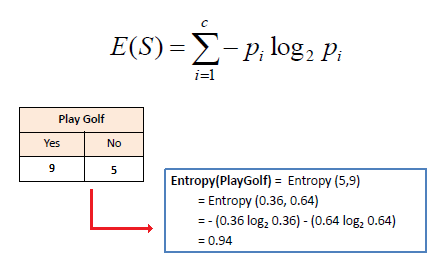

**Information gain** is used to train decision trees.These metrics measure quality of a split.

In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/car_data/car.data",names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
data['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data[data['doors']=='4']

,buying,maint,doors,persons,lug_boot,safety,class
54,vhigh,vhigh,4,2,small,low,unacc
55,vhigh,vhigh,4,2,small,med,unacc
56,vhigh,vhigh,4,2,small,high,unacc
57,vhigh,vhigh,4,2,med,low,unacc
58,vhigh,vhigh,4,2,med,med,unacc
...,...,...,...,...,...,...,...
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc
1699,low,low,4,more,big,med,good


Factorize is a type of Label Encoding

In [ ]:
data['class'],class_names=pd.factorize(data['class'])
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [ ]:
data_backup=data.copy()
data_backup.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


Underscore is used as we don,t need the second parameter that is the name of classes(Dummy variable)


In [ ]:
data['buying'],_=pd.factorize(data['buying'])
data['maint'],_=pd.factorize(data['maint'])
data['doors'],_=pd.factorize(data['doors'])
data['persons'],_=pd.factorize(data['persons'])
data['lug_boot'],_=pd.factorize(data['lug_boot'])
data['safety'],_=pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [ ]:
x=data.drop('class',axis=1)
y=data['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(1382, 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_predict=model.predict(x_train)
print(accuracy_score(y_train,y_train_predict))

1.0


Test Accuracy

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 3, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 0, 3, 1, 1, 0, 0, 3, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9855491329479769


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[237   3   0   0]
 [  0  81   0   0]
 [  0   0  11   0]
 [  0   2   0  12]]


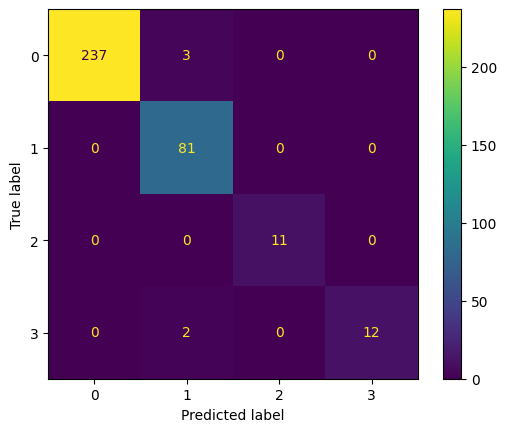

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred)).plot())

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       240
           1       0.94      1.00      0.97        81
           2       1.00      1.00      1.00        11
           3       1.00      0.86      0.92        14

    accuracy                           0.99       346
   macro avg       0.99      0.96      0.97       346
weighted avg       0.99      0.99      0.99       346

